In [6]:
import numpy as np
import basix
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import numpy as np
import matplotlib.pyplot as plt
import bbax

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
lagrange = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
regions = [
    (2.0, [2.0], np.array([[[0.0]]]), [2.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]
N_max = 5
APN, bPN, nodes= bbax.PN.Create_PN_Matrix_From_Regions(lagrange, regions, elements_per_cm =10, N_max =N_max, bc = 'marshak', energy_group=0)

ADPN, bDPN, nodes= bbax.DPN.Create_DPN_Matrix_From_Regions(lagrange, regions, elements_per_cm =10, N_max =N_max, bc = 'vacuum', energy_group=0)

[[-5.00000000e-01  3.33333333e-02  6.76094396e-01 -2.69079151e-01
   1.49645643e-01 -8.99942209e-02]
 [-3.33333333e-02  5.00000000e-01  8.99942209e-02 -1.49645643e-01
   2.69079151e-01 -6.76094396e-01]
 [-6.76094396e-01 -8.99942209e-02  3.61689845e-16  9.55053839e-01
  -4.36316587e-01  2.47351364e-01]
 [ 2.69079151e-01  1.49645643e-01 -9.55053839e-01  2.73652628e-16
   9.72645632e-01 -4.36316587e-01]
 [-1.49645643e-01 -2.69079151e-01  4.36316587e-01 -9.72645632e-01
  -2.20309881e-16  9.55053839e-01]
 [ 8.99942209e-02  6.76094396e-01 -2.47351364e-01  4.36316587e-01
  -9.55053839e-01 -1.66533454e-15]]


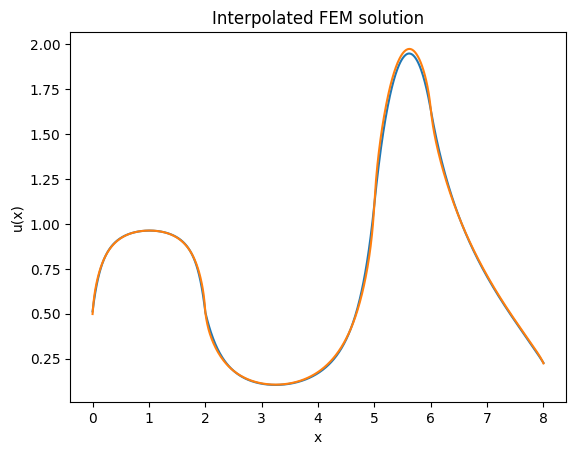

In [8]:
import numpy as np
from scipy.sparse.linalg import spsolve, cg

x = spsolve(APN.tocsr(), bPN)
# Example usage:
# Suppose you want to plot the solution at 1000 points:
elem_dofs, _ = bbax.PN.create_dof_matrix_vertex_interior(lagrange, nodes)

x_plot = np.linspace(nodes[0], nodes[-1], 1000)
u_plot = bbax.PN.interpolate_PN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max, 0)


plt.plot(x_plot, u_plot)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Interpolated FEM solution")

x = spsolve(ADPN.tocsr(), bDPN)
# Example usage:
# Suppose you want to plot the solution at 1000 points:
elem_dofs, _ = bbax.DPN.create_dof_matrix_vertex_interior(lagrange, nodes)

x_plot = np.linspace(nodes[0], nodes[-1], 1000)
u_plot = 0.5* ( bbax.DPN.interpolate_DPN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max, 0, 1) + bbax.DPN.interpolate_DPN_solution(x_plot, nodes, elem_dofs, x, lagrange, N_max, 0, -1))



plt.plot(x_plot, u_plot)